# Heirarchical Clustering

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
dist_mat = [
	[0, 3, 8, 7, 8],
	[3, 0, 4, 8, 8],
	[8, 4, 0, 5, 6],
	[7, 8, 5, 0, 6],
	[8, 8, 6, 6, 0]
]

In [16]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Linkage = 'single'

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed', linkage='single')
model = model.fit(dist_mat)

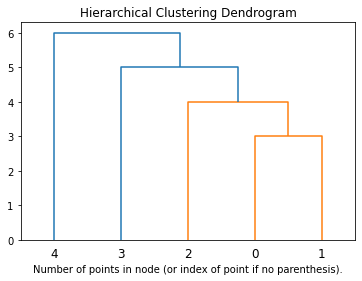

In [24]:
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
# plot the top three levels of the dendrogram
plot_dendrogram(model_single) # truncate_mode="level", p=3
plt.xlabel("Gene (0:a, 1:b, 2:c, 3:d, 4:e)")
plt.show()

Linkage = 'complete'

In [25]:
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed', linkage='complete')
model_complete = model_complete.fit(dist_mat)

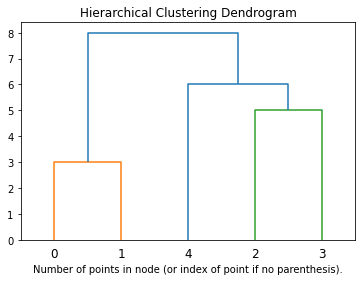

In [27]:
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
# plot the top three levels of the dendrogram
plot_dendrogram(model_complete) # truncate_mode="level", p=3
plt.xlabel("Gene (0:a, 1:b, 2:c, 3:d, 4:e)")
plt.show()